### General functions ###

In [8]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
# Models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



In [9]:
def process_dataset(df):
    is_all_5G = (df['NetworkMode'] == '5G').all()
    is_all_D = (df['State'] == 'D').all()

    # Verifica se todas as colunas RSRP, RSSI, SNR, RESP e CQI não contêm "-"
    no_hyphens = (df[['RSRP', 'RSSI', 'SNR', 'RSRQ', 'CQI']] != '-').all(axis=1)

    if is_all_5G and is_all_D and no_hyphens.all():
        return df
    
    if not is_all_5G:
        df = df[df['NetworkMode'] == '5G']
    
    if not is_all_D:
        df = df[df['State'] == 'D']
    
    df = df[no_hyphens]
    
    return df


In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def generate_confusion_matrix(y_pred, y_test):
    labels = [0, 1, 2, 3, 4, 5, 6]
    
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    f, ax = plt.subplots(figsize=(8, 7))
    sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
    plt.xlabel("Valores Previstos")
    plt.ylabel("Valores Reais")
    plt.show()

    

In [11]:
def get_accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

In [12]:
def get_classification_report(y_test, y_pred):
    return classification_report(y_test, y_pred)

In [13]:
def get_parse_report(report):
    result = []
    lines = report.split('\n')

    for line in lines:
        parts = line.split()
        if len(parts) == 5 and parts[0] != 'accuracy':
            class_name, precision, recall, f1_score, support = parts
            result.append({
                "Class": class_name,
                "Precision": precision,
                "Recall": recall,
                "F1-Score": f1_score,
                "Support": support
            })
    
    return result

In [14]:
def generate_more_rows(my_dataset):
  
    selected_classes = my_dataset[my_dataset['Class'].isin([2,3, 4, 5])]

    num_replicas = 20
    replicas = [selected_classes] * num_replicas

    # Concatenando as réplicas ao DataFrame original
    my_dataset = pd.concat([my_dataset] + replicas, ignore_index=True)
    return my_dataset

### Create the video resolution ranges in mb/s ###


In [15]:
dictionary_resolution_types ={}
dictionary_resolution_types ['0'] = 0
dictionary_resolution_types ['144p'] = 1
dictionary_resolution_types['360p'] = 2
dictionary_resolution_types['480p'] = 3
dictionary_resolution_types['720p'] = 4
dictionary_resolution_types['1080p'] = 5
dictionary_resolution_types['4K'] = 6


In [16]:
dictionary_resolution_values = {}
dictionary_resolution_values[20] = '4K'
dictionary_resolution_values[5] = '1080p'
dictionary_resolution_values[2.5] = '720p'
dictionary_resolution_values[1.1] = '480p'
dictionary_resolution_values[0.7] ='360p'
dictionary_resolution_values[0.1] ='144p'


In [17]:
def classifier_resolution_range (value) :
    value_f = pd.to_numeric(value,errors='coerce')
    value_f = value_f/1000
    # > 360p
    if value_f > 0 and value_f < 0.7:
        value_f = 0.1
        value_video = dictionary_resolution_values[value_f]
        value_return = dictionary_resolution_types[value_video]
        # print(value_return)
        return value_return
    #360p
    elif value_f >= 0.7 and value_f < 1.1:
        value_f = 0.7
        value_video = dictionary_resolution_values[value_f]
        value_return = dictionary_resolution_types[value_video]
        # print(value_return)
        return value_return
    #480p
    elif value_f >= 1.1 and value_f < 2.5:
        value_f = 1.1
        value_video = dictionary_resolution_values[value_f]
        value_return = dictionary_resolution_types[value_video]
        # print(value_return)
        return value_return
    #720p
    elif value_f >= 2.5 and value_f < 5:
        value_f = 2.5
        value_video = dictionary_resolution_values[value_f]
        value_return = dictionary_resolution_types[value_video]
        # print(value_return)
        return value_return
    #1080p
    elif value_f >= 5 and value_f < 20:
        value_f = 5
        value_video = dictionary_resolution_values[value_f]
        value_return = dictionary_resolution_types[value_video]
        # print(value_return)
        return value_return
    #4K
    elif value_f > 20:
        value_f = 20
        value_video = dictionary_resolution_values[value_f]
        value_return = dictionary_resolution_types[value_video]
        # print(value_return)
        return value_return
    # 0
    else:
        return 0


### Feature Egineering ###

In [18]:
data_directory_Netflix = r"..\Original - Dataset\Netflix Driving"
data_directory_Amazon = r"..\Original - Dataset\Amazon Driving"

In [19]:
dataframes = []

In [20]:
for filename in os.listdir(data_directory_Amazon):
    if filename.endswith(".csv"):  
        filepath = os.path.join(data_directory_Amazon, filename)
        df = pd.read_csv(filepath)  
        df = process_dataset(df)
        dataframes.append(df)

for filename in os.listdir(data_directory_Netflix):
    if filename.endswith(".csv"):  
        filepath = os.path.join(data_directory_Netflix, filename)
        df = pd.read_csv(filepath)  
        df = process_dataset(df)
        dataframes.append(df)



C:\Users\IvoAg\AppData\Local\Temp\ipykernel_11012\418712966.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[no_hyphens]
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_11012\418712966.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[no_hyphens]
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_11012\418712966.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[no_hyphens]
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_11012\418712966.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[no_hyphens]
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_11012\418712966.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[no_hyphens]
C:\Users\IvoAg\AppData\Local\Temp\ipykernel_11012\418712966.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[no_hyphens]
C:\Users\I

In [21]:
len(dataframes)

44

In [22]:
my_datasets = pd.concat(dataframes, ignore_index=True)

In [23]:
my_datasets.shape

(21796, 26)

In [24]:
my_datasets['DL_bitrate'] = pd.to_numeric(my_datasets['DL_bitrate'], errors='coerce')
my_datasets['UL_bitrate'] = pd.to_numeric(my_datasets['UL_bitrate'], errors='coerce')


In [25]:
my_datasets['Class'] = my_datasets['DL_bitrate'].apply(classifier_resolution_range)

In [26]:
my_datasets = my_datasets[my_datasets['DL_bitrate'] != 0]

In [27]:
my_datasets[['DL_bitrate', 'Class']].min()

DL_bitrate    1
Class         1
dtype: int64

In [28]:
my_datasets['Class'].value_counts() 

1    10595
3     2303
5      952
4      932
2      599
6      390
Name: Class, dtype: int64

In [29]:
my_datasets = generate_more_rows(my_datasets)

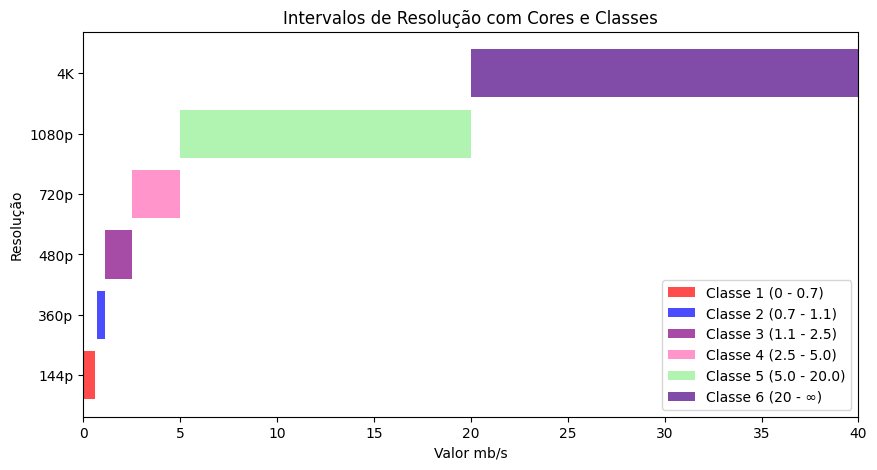

In [30]:
import matplotlib.pyplot as plt
import numpy as np


intervals = [(0, 0.6, '144p', '#FF0000', '1 (0 - 0.7)'),
             (0.7, 1.1, '360p', '#0000FF', '2 (0.7 - 1.1)'),
             (1.1, 2.5, '480p', '#800080', '3 (1.1 - 2.5)'),
             (2.5, 5, '720p', '#FF69B4', '4 (2.5 - 5.0)'),
             (5, 20, '1080p', '#90EE90', '5 (5.0 - 20.0)'),
             (20, 40, '4K', '#4B0082', '6 (20 - ∞)')]


plt.figure(figsize=(10, 5))

for start, end, label, color, cls in intervals:
    plt.barh(label, end - start, left=start, color=color, alpha=0.7, label=f'Classe {cls}')

plt.title('Intervalos de Resolução com Cores e Classes')
plt.xlabel('Valor mb/s')
plt.ylabel('Resolução')
plt.xlim(0, 40)
plt.legend(loc='lower right')
plt.show()


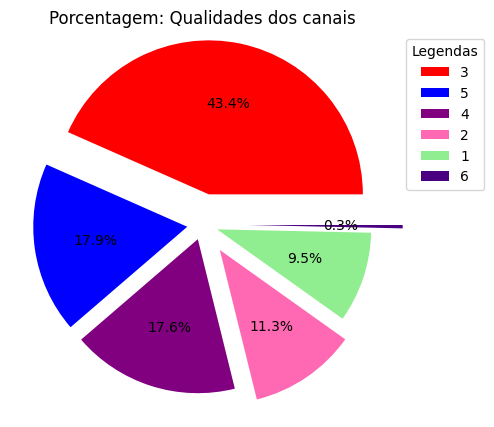

In [31]:
import matplotlib.pyplot as plt

colors = ['#FF0000', '#0000FF', '#800080', '#FF69B4', '#90EE90', '#4B0082']

plt.figure(figsize=(8, 5))


explode = (0.2, 0.1, 0.1, 0.2, 0.1, 0.3)

labels = my_datasets['Class'].value_counts().index
plt.pie(my_datasets['Class'].value_counts(), autopct='%1.1f%%', colors=colors, explode=explode)
plt.legend(labels, bbox_to_anchor=(1.25, 1), title='Legendas')
plt.title('Porcentagem: Qualidades dos canais')
plt.show()

### Classification Models ###

In [32]:
my_datasets.columns

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname', 'CellID',
       'NetworkMode', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'State', 'PINGAVG', 'PINGMIN', 'PINGMAX', 'PINGSTDEV',
       'PINGLOSS', 'CELLHEX', 'NODEHEX', 'LACHEX', 'RAWCELLID', 'NRxRSRP',
       'NRxRSRQ', 'Class'],
      dtype='object')

In [33]:
training_collumns = ['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI']
X  =  my_datasets[training_collumns]
y = my_datasets['Class']

print(X.shape)
print(y.shape)

(111491, 5)
(111491,)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Gradient Boost Classifier ####

In [39]:
param_grid = {
    'n_estimators': [50, 75, 100],      
    'learning_rate': [0.01],  
    'max_depth': [3, 5],            
}

model = GradientBoostingClassifier(random_state=42, verbose=2)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=2, verbose=2)

grid_search.fit(X_train, y_train)



Fitting 2 folds for each of 6 candidates, totalling 12 fits
      Iter       Train Loss   Remaining Time 
         1           1.4640            7.38s
         2           1.4630            7.10s
         3           1.4622            6.74s
         4           1.4613            6.53s
         5           1.4605            6.28s
         6           1.4597            6.08s
         7           1.4589            5.97s
         8           1.4581            5.81s
         9           1.4573            5.69s
        10           1.4566            5.56s
        11           1.4558            5.42s
        12           1.4551            5.29s
        13           1.4544            5.13s
        14           1.4537            4.98s
        15           1.4530            4.82s
        16           1.4524            4.66s
        17           1.4517            4.50s
        18           1.4511            4.37s
        19           1.4504            4.24s
        20           1.4498            

GridSearchCV(cv=2,
             estimator=GradientBoostingClassifier(random_state=42, verbose=2),
             param_grid={'learning_rate': [0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy', verbose=2)

In [40]:
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_gbr = best_model.predict(X_test)

Melhores hiperparâmetros encontrados:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


##### Métricas #####

In [41]:
accuray_gbr = get_accuracy(y_test, y_pred_gbr)
classification_report_gbr = get_classification_report(y_test, y_pred_gbr )
results_gbr = get_parse_report(classification_report_gbr)

print("Acurácia: {:.2f}".format(accuray_gbr))
print("Relatório de Classificação:\n{}".format(classification_report_gbr))

Acurácia: 0.47
Relatório de Classificação:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00      3159
           2       0.95      0.02      0.04      3729
           3       0.46      0.98      0.62     14468
           4       1.00      0.01      0.03      5992
           5       0.60      0.22      0.32      5973
           6       1.00      0.01      0.02       127

    accuracy                           0.47     33448
   macro avg       0.84      0.21      0.17     33448
weighted avg       0.69      0.47      0.34     33448



##### Confusion Matrix #####


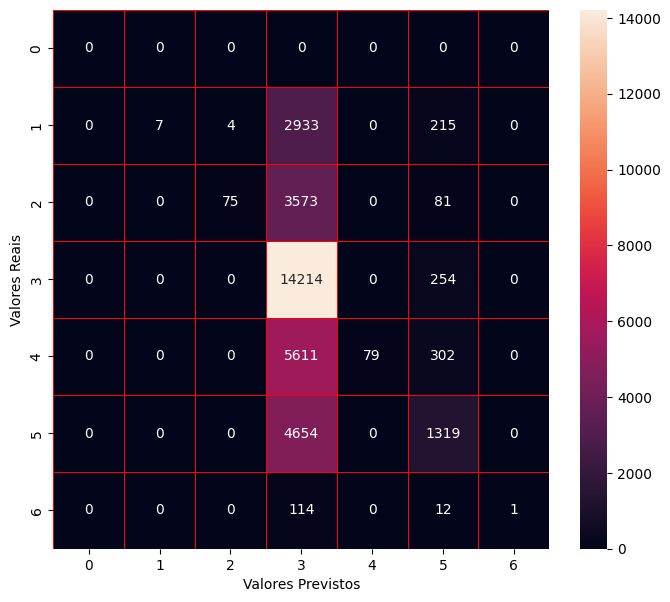

In [73]:
generate_confusion_matrix(y_pred_gbr, y_test)

#### KNN ####

In [43]:
param_grid = {
    'n_neighbors': [3, 5, 7],  
    'algorithm': ['kd_tree', 'ball_tree', 'auto', 'brute'],
}

# Crie o modelo
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=2)

grid_search.fit(X_train, y_train)

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Py

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'ball_tree', 'auto', 'brute'],
                         'n_neighbors': [3, 5, 7]},
             scoring='accuracy')

In [44]:
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_knn = best_model.predict(X_test)


Melhores hiperparâmetros encontrados:
{'algorithm': 'kd_tree', 'n_neighbors': 3}


##### Metrics #####

In [45]:
accuray_knn = get_accuracy(y_test, y_pred_knn)
classification_report_knn = get_classification_report(y_test, y_pred_knn )
results_knn = get_parse_report(classification_report_knn)

print("Acurácia: {:.2f}".format(accuray_knn))
print("Relatório de Classificação:\n{}".format(classification_report_knn))

Acurácia: 0.91
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.96      0.37      0.53      3159
           2       0.90      0.98      0.94      3729
           3       0.92      0.98      0.95     14468
           4       0.91      0.96      0.94      5992
           5       0.91      0.97      0.94      5973
           6       0.19      0.02      0.04       127

    accuracy                           0.91     33448
   macro avg       0.80      0.71      0.72     33448
weighted avg       0.91      0.91      0.90     33448



##### Confusion Matrix #####

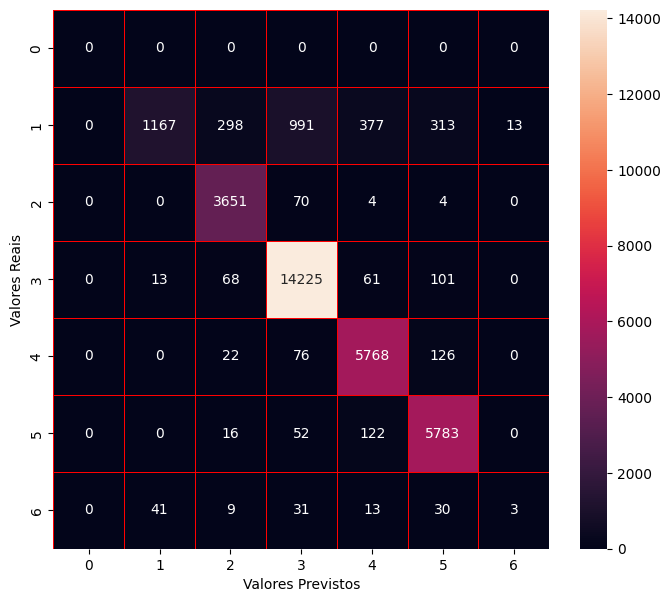

In [74]:
generate_confusion_matrix(y_pred_knn, y_test)

#### MLP ####

In [47]:
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)],  
    'max_iter': [10 , 25, 50],
}

mlp = MLPClassifier(random_state=42, verbose=2)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=2)

grid_search.fit(X_train, y_train)

Iteration 1, loss = 2.06470526
Iteration 2, loss = 1.47574547
Iteration 3, loss = 1.46602655
Iteration 4, loss = 1.45942514
Iteration 5, loss = 1.45509844
Iteration 6, loss = 1.45357451
Iteration 7, loss = 1.45162030
Iteration 8, loss = 1.45096911
Iteration 9, loss = 1.45045607
Iteration 10, loss = 1.44911923


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.03485870
Iteration 2, loss = 1.47674626
Iteration 3, loss = 1.47086465
Iteration 4, loss = 1.45812350
Iteration 5, loss = 1.45692376
Iteration 6, loss = 1.45993250
Iteration 7, loss = 1.45992895
Iteration 8, loss = 1.45385349
Iteration 9, loss = 1.45065006
Iteration 10, loss = 1.45374442


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.06470526
Iteration 2, loss = 1.47574547
Iteration 3, loss = 1.46602655
Iteration 4, loss = 1.45942514
Iteration 5, loss = 1.45509844
Iteration 6, loss = 1.45357451
Iteration 7, loss = 1.45162030
Iteration 8, loss = 1.45096911
Iteration 9, loss = 1.45045607
Iteration 10, loss = 1.44911923
Iteration 11, loss = 1.44663567
Iteration 12, loss = 1.44348069
Iteration 13, loss = 1.44537607
Iteration 14, loss = 1.44569172
Iteration 15, loss = 1.44113199
Iteration 16, loss = 1.44864477
Iteration 17, loss = 1.44321907
Iteration 18, loss = 1.43754781
Iteration 19, loss = 1.44059286
Iteration 20, loss = 1.43778717
Iteration 21, loss = 1.43765495
Iteration 22, loss = 1.43480281
Iteration 23, loss = 1.43681110
Iteration 24, loss = 1.43552907
Iteration 25, loss = 1.43461909


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.03485870
Iteration 2, loss = 1.47674626
Iteration 3, loss = 1.47086465
Iteration 4, loss = 1.45812350
Iteration 5, loss = 1.45692376
Iteration 6, loss = 1.45993250
Iteration 7, loss = 1.45992895
Iteration 8, loss = 1.45385349
Iteration 9, loss = 1.45065006
Iteration 10, loss = 1.45374442
Iteration 11, loss = 1.45328673
Iteration 12, loss = 1.45253155
Iteration 13, loss = 1.44972895
Iteration 14, loss = 1.44675690
Iteration 15, loss = 1.44920027
Iteration 16, loss = 1.44868774
Iteration 17, loss = 1.44715132
Iteration 18, loss = 1.44386144
Iteration 19, loss = 1.44530268
Iteration 20, loss = 1.44330891
Iteration 21, loss = 1.44313120
Iteration 22, loss = 1.44017555
Iteration 23, loss = 1.44292586
Iteration 24, loss = 1.44500442
Iteration 25, loss = 1.43808537


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.06470526
Iteration 2, loss = 1.47574547
Iteration 3, loss = 1.46602655
Iteration 4, loss = 1.45942514
Iteration 5, loss = 1.45509844
Iteration 6, loss = 1.45357451
Iteration 7, loss = 1.45162030
Iteration 8, loss = 1.45096911
Iteration 9, loss = 1.45045607
Iteration 10, loss = 1.44911923
Iteration 11, loss = 1.44663567
Iteration 12, loss = 1.44348069
Iteration 13, loss = 1.44537607
Iteration 14, loss = 1.44569172
Iteration 15, loss = 1.44113199
Iteration 16, loss = 1.44864477
Iteration 17, loss = 1.44321907
Iteration 18, loss = 1.43754781
Iteration 19, loss = 1.44059286
Iteration 20, loss = 1.43778717
Iteration 21, loss = 1.43765495
Iteration 22, loss = 1.43480281
Iteration 23, loss = 1.43681110
Iteration 24, loss = 1.43552907
Iteration 25, loss = 1.43461909
Iteration 26, loss = 1.43293468
Iteration 27, loss = 1.43322403
Iteration 28, loss = 1.43249310
Iteration 29, loss = 1.43132193
Iteration 30, loss = 1.43021863
Iteration 31, loss = 1.43092537
Iteration 32, los

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.03485870
Iteration 2, loss = 1.47674626
Iteration 3, loss = 1.47086465
Iteration 4, loss = 1.45812350
Iteration 5, loss = 1.45692376
Iteration 6, loss = 1.45993250
Iteration 7, loss = 1.45992895
Iteration 8, loss = 1.45385349
Iteration 9, loss = 1.45065006
Iteration 10, loss = 1.45374442
Iteration 11, loss = 1.45328673
Iteration 12, loss = 1.45253155
Iteration 13, loss = 1.44972895
Iteration 14, loss = 1.44675690
Iteration 15, loss = 1.44920027
Iteration 16, loss = 1.44868774
Iteration 17, loss = 1.44715132
Iteration 18, loss = 1.44386144
Iteration 19, loss = 1.44530268
Iteration 20, loss = 1.44330891
Iteration 21, loss = 1.44313120
Iteration 22, loss = 1.44017555
Iteration 23, loss = 1.44292586
Iteration 24, loss = 1.44500442
Iteration 25, loss = 1.43808537
Iteration 26, loss = 1.43995302
Iteration 27, loss = 1.44111869
Iteration 28, loss = 1.43825600
Iteration 29, loss = 1.43999348
Iteration 30, loss = 1.43500822
Iteration 31, loss = 1.43677513
Iteration 32, los

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86379793
Iteration 2, loss = 1.47058496
Iteration 3, loss = 1.47186690
Iteration 4, loss = 1.46276191
Iteration 5, loss = 1.46108272
Iteration 6, loss = 1.46292813
Iteration 7, loss = 1.45764910
Iteration 8, loss = 1.45755705
Iteration 9, loss = 1.45530458
Iteration 10, loss = 1.45602771


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88132503
Iteration 2, loss = 1.47130050
Iteration 3, loss = 1.47147437
Iteration 4, loss = 1.46582534
Iteration 5, loss = 1.46772539
Iteration 6, loss = 1.46458506
Iteration 7, loss = 1.46835469
Iteration 8, loss = 1.46160991
Iteration 9, loss = 1.46063139
Iteration 10, loss = 1.46077010


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86379793
Iteration 2, loss = 1.47058496
Iteration 3, loss = 1.47186690
Iteration 4, loss = 1.46276191
Iteration 5, loss = 1.46108272
Iteration 6, loss = 1.46292813
Iteration 7, loss = 1.45764910
Iteration 8, loss = 1.45755705
Iteration 9, loss = 1.45530458
Iteration 10, loss = 1.45602771
Iteration 11, loss = 1.45108198
Iteration 12, loss = 1.45166805
Iteration 13, loss = 1.44436165
Iteration 14, loss = 1.44660572
Iteration 15, loss = 1.44576139
Iteration 16, loss = 1.44309638
Iteration 17, loss = 1.44013926
Iteration 18, loss = 1.44029811
Iteration 19, loss = 1.43411845
Iteration 20, loss = 1.43655049
Iteration 21, loss = 1.43592221
Iteration 22, loss = 1.43415149
Iteration 23, loss = 1.43183709
Iteration 24, loss = 1.42848158
Iteration 25, loss = 1.43192879


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88132503
Iteration 2, loss = 1.47130050
Iteration 3, loss = 1.47147437
Iteration 4, loss = 1.46582534
Iteration 5, loss = 1.46772539
Iteration 6, loss = 1.46458506
Iteration 7, loss = 1.46835469
Iteration 8, loss = 1.46160991
Iteration 9, loss = 1.46063139
Iteration 10, loss = 1.46077010
Iteration 11, loss = 1.45188886
Iteration 12, loss = 1.45113964
Iteration 13, loss = 1.44736101
Iteration 14, loss = 1.45060645
Iteration 15, loss = 1.44720333
Iteration 16, loss = 1.44304604
Iteration 17, loss = 1.44318411
Iteration 18, loss = 1.44572480
Iteration 19, loss = 1.44057057
Iteration 20, loss = 1.44216889
Iteration 21, loss = 1.43808877
Iteration 22, loss = 1.43821520
Iteration 23, loss = 1.43798931
Iteration 24, loss = 1.43869230
Iteration 25, loss = 1.43770448


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.86379793
Iteration 2, loss = 1.47058496
Iteration 3, loss = 1.47186690
Iteration 4, loss = 1.46276191
Iteration 5, loss = 1.46108272
Iteration 6, loss = 1.46292813
Iteration 7, loss = 1.45764910
Iteration 8, loss = 1.45755705
Iteration 9, loss = 1.45530458
Iteration 10, loss = 1.45602771
Iteration 11, loss = 1.45108198
Iteration 12, loss = 1.45166805
Iteration 13, loss = 1.44436165
Iteration 14, loss = 1.44660572
Iteration 15, loss = 1.44576139
Iteration 16, loss = 1.44309638
Iteration 17, loss = 1.44013926
Iteration 18, loss = 1.44029811
Iteration 19, loss = 1.43411845
Iteration 20, loss = 1.43655049
Iteration 21, loss = 1.43592221
Iteration 22, loss = 1.43415149
Iteration 23, loss = 1.43183709
Iteration 24, loss = 1.42848158
Iteration 25, loss = 1.43192879
Iteration 26, loss = 1.42971374
Iteration 27, loss = 1.42757172
Iteration 28, loss = 1.42855939
Iteration 29, loss = 1.42782486
Iteration 30, loss = 1.42516039
Iteration 31, loss = 1.42620000
Iteration 32, los

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.88132503
Iteration 2, loss = 1.47130050
Iteration 3, loss = 1.47147437
Iteration 4, loss = 1.46582534
Iteration 5, loss = 1.46772539
Iteration 6, loss = 1.46458506
Iteration 7, loss = 1.46835469
Iteration 8, loss = 1.46160991
Iteration 9, loss = 1.46063139
Iteration 10, loss = 1.46077010
Iteration 11, loss = 1.45188886
Iteration 12, loss = 1.45113964
Iteration 13, loss = 1.44736101
Iteration 14, loss = 1.45060645
Iteration 15, loss = 1.44720333
Iteration 16, loss = 1.44304604
Iteration 17, loss = 1.44318411
Iteration 18, loss = 1.44572480
Iteration 19, loss = 1.44057057
Iteration 20, loss = 1.44216889
Iteration 21, loss = 1.43808877
Iteration 22, loss = 1.43821520
Iteration 23, loss = 1.43798931
Iteration 24, loss = 1.43869230
Iteration 25, loss = 1.43770448
Iteration 26, loss = 1.43425280
Iteration 27, loss = 1.43266023
Iteration 28, loss = 1.43401795
Iteration 29, loss = 1.43115221
Iteration 30, loss = 1.43045688
Iteration 31, loss = 1.43170612
Iteration 32, los

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.73604938
Iteration 2, loss = 1.51921933
Iteration 3, loss = 1.49418291
Iteration 4, loss = 1.48674309
Iteration 5, loss = 1.48247429
Iteration 6, loss = 1.48014977
Iteration 7, loss = 1.47683564
Iteration 8, loss = 1.47477175
Iteration 9, loss = 1.47678841
Iteration 10, loss = 1.47792519


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.81705283
Iteration 2, loss = 1.52581826
Iteration 3, loss = 1.49626246
Iteration 4, loss = 1.48839906
Iteration 5, loss = 1.48348963
Iteration 6, loss = 1.47741206
Iteration 7, loss = 1.47913485
Iteration 8, loss = 1.47751380
Iteration 9, loss = 1.47453300
Iteration 10, loss = 1.47242803
Iteration 1, loss = 6.73604938
Iteration 2, loss = 1.51921933


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.49418291
Iteration 4, loss = 1.48674309
Iteration 5, loss = 1.48247429
Iteration 6, loss = 1.48014977
Iteration 7, loss = 1.47683564
Iteration 8, loss = 1.47477175
Iteration 9, loss = 1.47678841
Iteration 10, loss = 1.47792519
Iteration 11, loss = 1.47656497
Iteration 12, loss = 1.47159516
Iteration 13, loss = 1.46759768
Iteration 14, loss = 1.47004382
Iteration 15, loss = 1.47299724
Iteration 16, loss = 1.46960655
Iteration 17, loss = 1.46807351
Iteration 18, loss = 1.46718972
Iteration 19, loss = 1.46831669
Iteration 20, loss = 1.46732592
Iteration 21, loss = 1.46312869
Iteration 22, loss = 1.46262952
Iteration 23, loss = 1.46419135
Iteration 24, loss = 1.45981687
Iteration 25, loss = 1.46632268


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.81705283
Iteration 2, loss = 1.52581826
Iteration 3, loss = 1.49626246
Iteration 4, loss = 1.48839906
Iteration 5, loss = 1.48348963
Iteration 6, loss = 1.47741206
Iteration 7, loss = 1.47913485
Iteration 8, loss = 1.47751380
Iteration 9, loss = 1.47453300
Iteration 10, loss = 1.47242803
Iteration 11, loss = 1.48078566
Iteration 12, loss = 1.47436877
Iteration 13, loss = 1.47076450
Iteration 14, loss = 1.46955261
Iteration 15, loss = 1.47347110
Iteration 16, loss = 1.46643674
Iteration 17, loss = 1.46829758
Iteration 18, loss = 1.46315241
Iteration 19, loss = 1.46728907
Iteration 20, loss = 1.46973906
Iteration 21, loss = 1.46609135
Iteration 22, loss = 1.46201700
Iteration 23, loss = 1.46131072
Iteration 24, loss = 1.46804992
Iteration 25, loss = 1.46272002


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 6.73604938
Iteration 2, loss = 1.51921933
Iteration 3, loss = 1.49418291
Iteration 4, loss = 1.48674309
Iteration 5, loss = 1.48247429
Iteration 6, loss = 1.48014977
Iteration 7, loss = 1.47683564
Iteration 8, loss = 1.47477175
Iteration 9, loss = 1.47678841
Iteration 10, loss = 1.47792519
Iteration 11, loss = 1.47656497
Iteration 12, loss = 1.47159516
Iteration 13, loss = 1.46759768
Iteration 14, loss = 1.47004382
Iteration 15, loss = 1.47299724
Iteration 16, loss = 1.46960655
Iteration 17, loss = 1.46807351
Iteration 18, loss = 1.46718972
Iteration 19, loss = 1.46831669
Iteration 20, loss = 1.46732592
Iteration 21, loss = 1.46312869
Iteration 22, loss = 1.46262952
Iteration 23, loss = 1.46419135
Iteration 24, loss = 1.45981687
Iteration 25, loss = 1.46632268
Iteration 26, loss = 1.46347587
Iteration 27, loss = 1.45946791
Iteration 28, loss = 1.46253875
Iteration 29, loss = 1.45860031
Iteration 30, loss = 1.45670655
Iteration 31, loss = 1.45451509
Iteration 32, los

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.49626246
Iteration 4, loss = 1.48839906
Iteration 5, loss = 1.48348963
Iteration 6, loss = 1.47741206
Iteration 7, loss = 1.47913485
Iteration 8, loss = 1.47751380
Iteration 9, loss = 1.47453300
Iteration 10, loss = 1.47242803
Iteration 11, loss = 1.48078566
Iteration 12, loss = 1.47436877
Iteration 13, loss = 1.47076450
Iteration 14, loss = 1.46955261
Iteration 15, loss = 1.47347110
Iteration 16, loss = 1.46643674
Iteration 17, loss = 1.46829758
Iteration 18, loss = 1.46315241
Iteration 19, loss = 1.46728907
Iteration 20, loss = 1.46973906
Iteration 21, loss = 1.46609135
Iteration 22, loss = 1.46201700
Iteration 23, loss = 1.46131072
Iteration 24, loss = 1.46804992
Iteration 25, loss = 1.46272002
Iteration 26, loss = 1.46204582
Iteration 27, loss = 1.46537332
Iteration 28, loss = 1.46145897
Iteration 29, loss = 1.45881630
Iteration 30, loss = 1.46112065
Iteration 31, loss = 1.46010664
Iteration 32, loss = 1.45587003
Iteration 33, loss = 1.45919667
Iteration 34, l

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.76000157
Iteration 2, loss = 1.46727999
Iteration 3, loss = 1.45894693
Iteration 4, loss = 1.45329313
Iteration 5, loss = 1.45254608
Iteration 6, loss = 1.45130371
Iteration 7, loss = 1.44867366
Iteration 8, loss = 1.44648430
Iteration 9, loss = 1.44698639
Iteration 10, loss = 1.44323499
Iteration 11, loss = 1.44334138
Iteration 12, loss = 1.43930341
Iteration 13, loss = 1.43922870
Iteration 14, loss = 1.43762340
Iteration 15, loss = 1.43533319
Iteration 16, loss = 1.43562191
Iteration 17, loss = 1.43293555
Iteration 18, loss = 1.43396654
Iteration 19, loss = 1.43197628
Iteration 20, loss = 1.42997414
Iteration 21, loss = 1.42868361
Iteration 22, loss = 1.43120741
Iteration 23, loss = 1.42848926
Iteration 24, loss = 1.42640458
Iteration 25, loss = 1.42600035
Iteration 26, loss = 1.42612777
Iteration 27, loss = 1.42748405
Iteration 28, loss = 1.42480680
Iteration 29, loss = 1.42382339
Iteration 30, loss = 1.42445015
Iteration 31, loss = 1.42240277
Iteration 32, los

C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2, estimator=MLPClassifier(random_state=42, verbose=2),
             param_grid={'hidden_layer_sizes': [(64, 32), (128, 64), (32, 16)],
                         'max_iter': [10, 25, 50]},
             scoring='accuracy')

In [51]:
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_mlp = best_model.predict(X_test)

Melhores hiperparâmetros encontrados:
{'hidden_layer_sizes': (64, 32), 'max_iter': 50}


##### Metrics #####

In [62]:
accuray_mlp = get_accuracy(y_test, y_pred_mlp)
classification_report_mlp = get_classification_report(y_test, y_pred_mlp )
results_mlp = get_parse_report(classification_report_mlp)

print("Acurácia: {:.2f}".format(accuray_mlp))
print("Relatório de Classificação:\n{}".format(classification_report_mlp))

Acurácia: 0.46
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3159
           2       0.00      0.00      0.00      3729
           3       0.46      0.95      0.62     14468
           4       0.43      0.02      0.03      5992
           5       0.50      0.26      0.35      5973
           6       0.00      0.00      0.00       127

    accuracy                           0.46     33448
   macro avg       0.23      0.21      0.17     33448
weighted avg       0.36      0.46      0.34     33448



C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

#### Confusion Matrix ####

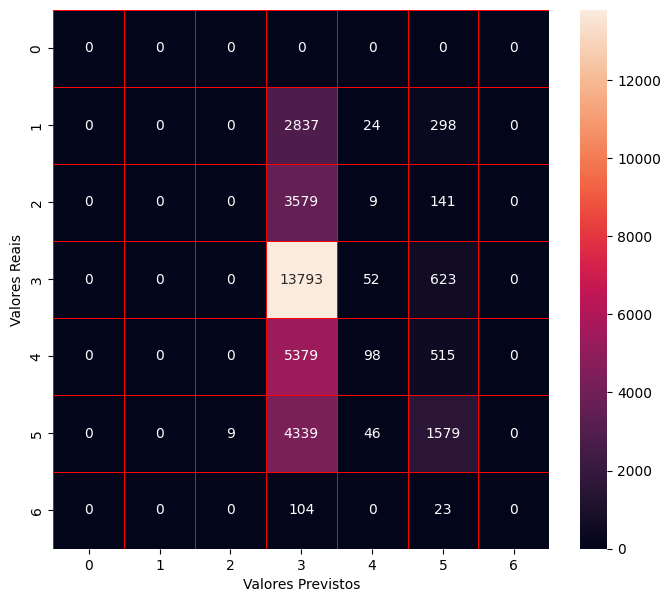

In [75]:
generate_confusion_matrix(y_pred_mlp, y_test)

#### Logistic Regression ####

In [54]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_lr = logistic_regression.predict(X_test)


C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Metrics #####

In [55]:
accuray_lr = get_accuracy(y_test, y_pred_lr)
classification_report_lr = get_classification_report(y_test, y_pred_lr )
results_lr = get_parse_report(classification_report_lr)

print("Acurácia: {:.2f}".format(accuray_lr))
print("Relatório de Classificação:\n{}".format(classification_report_lr))

Acurácia: 0.43
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3159
           2       0.00      0.00      0.00      3729
           3       0.43      0.99      0.60     14468
           4       0.00      0.00      0.00      5992
           5       0.34      0.01      0.02      5973
           6       0.00      0.00      0.00       127

    accuracy                           0.43     33448
   macro avg       0.13      0.17      0.10     33448
weighted avg       0.25      0.43      0.27     33448



C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

##### Confusion Matrix #####

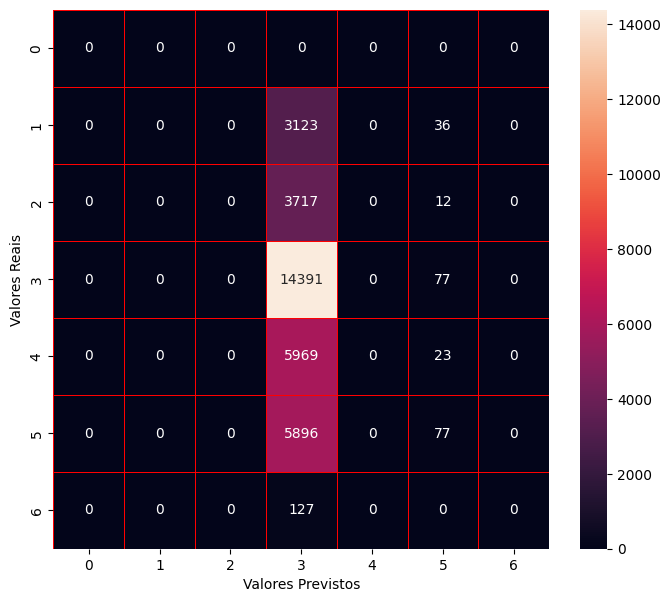

In [76]:
generate_confusion_matrix(y_pred_lr, y_test)

#### Random Forest ####

In [83]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],  
    'max_depth': [3,5,7]
}

random_forest = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, scoring='accuracy', cv=2)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [84]:
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

best_random_forest = grid_search.best_estimator_
y_pred_rf = best_random_forest.predict(X_test)

Melhores hiperparâmetros encontrados:
{'max_depth': 7, 'n_estimators': 100}


##### Metrics #####


In [85]:
accuray_rf = get_accuracy(y_test, y_pred_rf)
classification_report_rf = get_classification_report(y_test, y_pred_rf )
results_rf = get_parse_report(classification_report_rf)

print("Acurácia: {:.2f}".format(accuray_lr))
print("Relatório de Classificação:\n{}".format(classification_report_lr))

Acurácia: 0.43
Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      3159
           2       0.00      0.00      0.00      3729
           3       0.43      0.99      0.60     14468
           4       0.00      0.00      0.00      5992
           5       0.34      0.01      0.02      5973
           6       0.00      0.00      0.00       127

    accuracy                           0.43     33448
   macro avg       0.13      0.17      0.10     33448
weighted avg       0.25      0.43      0.27     33448



C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\IvoAg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

##### Confusion Matrix #####

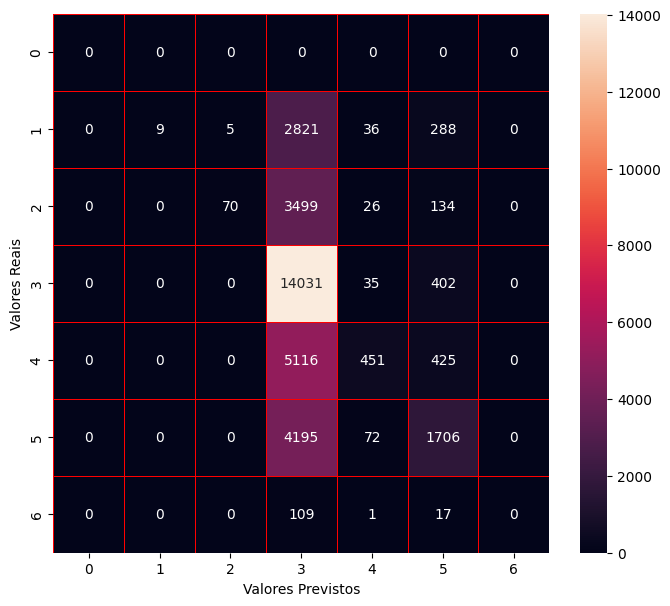

In [77]:
generate_confusion_matrix(y_pred_rf, y_test)

#### Create graphics of bar ####

In [100]:
results_gbr[0]

{'Class': '1',
 'Precision': '1.00',
 'Recall': '0.00',
 'F1-Score': '0.00',
 'Support': '3159'}